In [20]:
%store -r train_data
%store -r test_data
%store -r val_data
%store -r train_labels
%store -r test_labels
%store -r val_labels

In [21]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import svm


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split 

from sklearn.metrics import \
     classification_report, confusion_matrix,\
     accuracy_score, precision_score, recall_score, f1_score,roc_auc_score


import tensorflow as tf
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.optimizers import SGD



In [22]:
train_data = train_data
test_data = test_data
val_data = val_data
train_labels = train_labels
test_labels = test_labels
val_labels = val_labels

In [23]:
np.unique(val_labels)

array(['Ajwa', 'Mabroom', 'Sukkary'], dtype='<U7')

In [24]:
train_data

array([[[[197, 199, 198],
         [197, 199, 198],
         [197, 199, 198],
         ...,
         [193, 193, 193],
         [193, 193, 193],
         [193, 193, 193]],

        [[197, 199, 198],
         [197, 199, 198],
         [197, 199, 198],
         ...,
         [193, 193, 193],
         [193, 193, 193],
         [193, 193, 193]],

        [[197, 199, 198],
         [197, 199, 198],
         [197, 199, 198],
         ...,
         [193, 193, 193],
         [193, 193, 193],
         [193, 193, 193]],

        ...,

        [[231, 235, 234],
         [231, 235, 234],
         [231, 235, 234],
         ...,
         [232, 234, 231],
         [232, 234, 231],
         [232, 234, 231]],

        [[231, 235, 234],
         [231, 235, 234],
         [231, 235, 234],
         ...,
         [232, 234, 231],
         [232, 234, 231],
         [232, 234, 231]],

        [[231, 235, 234],
         [231, 235, 234],
         [231, 235, 234],
         ...,
         [232, 234, 231],
        

nRows, nCols = train_data.shape[2:]
nRows, nCols

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
val_labels_one_hot = to_categorical(val_labels)

Text(0.5, 1.0, 'Ajwa')

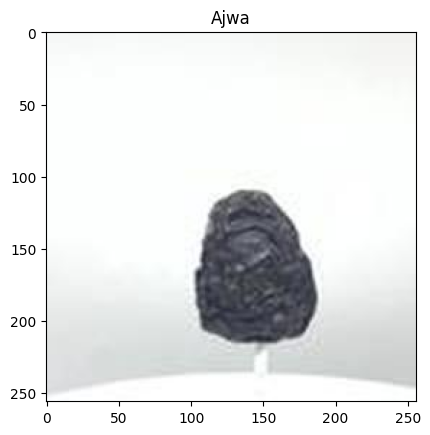

In [25]:
from matplotlib import pyplot as plt


plt.imshow(train_data[1])
plt.title(train_labels[1])

from tensorflow.keras.layers import ReLU

model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(256,256,3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 4
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

 # Block 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Fully Connected layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(3, activation='softmax'))

from tensorflow.keras.layers import ReLU

model = Sequential()

model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(256, 256, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#model.add(Dropout(0.25)) 

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [26]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())  # Adding BatchNormalization after the first Conv2D layer

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())  # Adding BatchNormalization after the second Conv2D layer

model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())  # Adding BatchNormalization after the third Conv2D layer

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3))
model.add(Dense(units=3, activation='softmax'))

In [27]:
model.compile(loss = "sparse_categorical_crossentropy",
optimizer = SGD(),
metrics = ["accuracy"])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 127, 127, 32)      128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0

from sklearn.linear_model import SGDClassifier
import keras.optimizers as op
model.compile(
    loss='hinge',
    optimizer='adam',
    metrics=['accuracy']
)


In [29]:
train_data.shape


(2704, 256, 256, 3)

In [30]:
val_labels

['Ajwa',
 'Sukkary',
 'Ajwa',
 'Ajwa',
 'Ajwa',
 'Ajwa',
 'Mabroom',
 'Ajwa',
 'Ajwa',
 'Sukkary',
 'Mabroom',
 'Mabroom',
 'Mabroom',
 'Sukkary',
 'Mabroom',
 'Mabroom',
 'Sukkary',
 'Ajwa',
 'Sukkary',
 'Ajwa',
 'Mabroom',
 'Sukkary',
 'Mabroom',
 'Sukkary',
 'Ajwa',
 'Ajwa',
 'Ajwa',
 'Mabroom',
 'Ajwa',
 'Ajwa',
 'Sukkary',
 'Ajwa',
 'Sukkary',
 'Ajwa',
 'Mabroom',
 'Mabroom',
 'Ajwa',
 'Sukkary',
 'Ajwa',
 'Sukkary',
 'Mabroom',
 'Sukkary',
 'Mabroom',
 'Mabroom',
 'Ajwa',
 'Mabroom',
 'Mabroom',
 'Ajwa',
 'Ajwa',
 'Mabroom',
 'Ajwa',
 'Ajwa',
 'Ajwa',
 'Ajwa',
 'Ajwa',
 'Ajwa',
 'Mabroom',
 'Mabroom',
 'Mabroom',
 'Ajwa',
 'Mabroom',
 'Mabroom',
 'Ajwa',
 'Mabroom',
 'Sukkary',
 'Ajwa',
 'Sukkary',
 'Ajwa',
 'Ajwa',
 'Sukkary',
 'Mabroom',
 'Sukkary',
 'Sukkary',
 'Sukkary',
 'Ajwa',
 'Mabroom',
 'Mabroom',
 'Mabroom',
 'Mabroom',
 'Sukkary',
 'Ajwa',
 'Ajwa',
 'Mabroom',
 'Ajwa',
 'Sukkary',
 'Mabroom',
 'Ajwa',
 'Ajwa',
 'Mabroom',
 'Mabroom',
 'Sukkary',
 'Mabroom',
 'Mabroom'

In [31]:
tl= np.array(train_labels)
vl = np.array(val_labels)

In [32]:
tl.shape

(2704,)

In [33]:
vl.shape

(341,)

In [34]:
train_data.shape



(2704, 256, 256, 3)

In [35]:
tl

array(['Sukkary', 'Ajwa', 'Mabroom', ..., 'Ajwa', 'Ajwa', 'Sukkary'],
      dtype='<U7')

In [36]:
from sklearn.calibration import LabelEncoder


le=LabelEncoder()

tl=le.fit_transform(tl)

vl=le.transform(vl)

In [37]:
train_data

array([[[[197, 199, 198],
         [197, 199, 198],
         [197, 199, 198],
         ...,
         [193, 193, 193],
         [193, 193, 193],
         [193, 193, 193]],

        [[197, 199, 198],
         [197, 199, 198],
         [197, 199, 198],
         ...,
         [193, 193, 193],
         [193, 193, 193],
         [193, 193, 193]],

        [[197, 199, 198],
         [197, 199, 198],
         [197, 199, 198],
         ...,
         [193, 193, 193],
         [193, 193, 193],
         [193, 193, 193]],

        ...,

        [[231, 235, 234],
         [231, 235, 234],
         [231, 235, 234],
         ...,
         [232, 234, 231],
         [232, 234, 231],
         [232, 234, 231]],

        [[231, 235, 234],
         [231, 235, 234],
         [231, 235, 234],
         ...,
         [232, 234, 231],
         [232, 234, 231],
         [232, 234, 231]],

        [[231, 235, 234],
         [231, 235, 234],
         [231, 235, 234],
         ...,
         [232, 234, 231],
        

In [38]:
tl

array([2, 0, 1, ..., 0, 0, 2], dtype=int64)

In [39]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [40]:
import tensorflow as tf



history = model.fit(
    train_data, tl, batch_size=128,
    epochs=10,validation_data=(val_data,vl)
)

Epoch 1/10




22/22 [==============================] - 63s 3s/step - loss: 0.6431 - accuracy: 0.8935 - val_loss: 32.7842 - val_accuracy: 0.3226
Epoch 2/10
22/22 [==============================] - 56s 3s/step - loss: 0.0137 - accuracy: 0.9967 - val_loss: 14.3685 - val_accuracy: 0.3226
Epoch 3/10
 1/22 [>.............................] - ETA: 56s - loss: 0.0235 - accuracy: 0.9844

KeyboardInterrupt: 